In [1]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [8]:
data = pd.read_csv('Churn_Modelling.csv')

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [11]:
## divide the dataset into dependent and independent variables
x = data.iloc[:,3:13]
y = data.iloc[:,13]

In [12]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [14]:
##feature engineering
geography=pd.get_dummies(x['Geography'], drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [17]:
## concatenate these variables with dataframe
x= x.drop(['Geography','Gender'], axis=1)

In [18]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [20]:
x=pd.concat([x, geography,gender],axis=1)

In [21]:
# splitting the dataset into training set and test set
from sklearn. model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)

In [24]:

#feature scaling

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [25]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [26]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [27]:
x_train.shape

(8000, 11)

In [28]:
##part 2 creation of ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ReLU, ELU
from tensorflow.keras.layers import Dropout

In [29]:
#### lets initialize ANN
Classifier= Sequential()

In [30]:
## Adding the input layer

Classifier.add(Dense(units=11, activation='relu'))

In [31]:
## add the first hidden layer
Classifier.add(Dense(units=7, activation='relu'))

In [33]:
## add the second hidden layer
Classifier.add(Dense(units=6, activation='relu'))

In [34]:
## adding the output layer
Classifier.add(Dense(1, activation='sigmoid'))

In [35]:
Classifier.compile(optimizer= 'Adam',loss= 'binary_crossentropy', metrics=['accuracy'])

In [39]:
##early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [40]:
model_history=Classifier.fit(x_train,y_train,validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 3ms/step - loss: 0.5617 - accuracy: 0.7753 - val_loss: 0.4529 - val_accuracy: 0.7974
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4155 - accuracy: 0.8130 - val_loss: 0.4059 - val_accuracy: 0.8145
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3858 - accuracy: 0.8196 - val_loss: 0.3911 - val_accuracy: 0.8156
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3774 - accuracy: 0.8199 - val_loss: 0.3886 - val_accuracy: 0.8164
Epoch 5/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3714 - accuracy: 0.8201 - val_loss: 0.3862 - val_accuracy: 0.8160
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3664 - accuracy: 0.8218 - val_loss: 0.3833 - val_accuracy: 0.8160
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3627 - accuracy: 0.8259 - val_loss: 0.3809 - val_accuracy:

In [41]:
model_history. history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

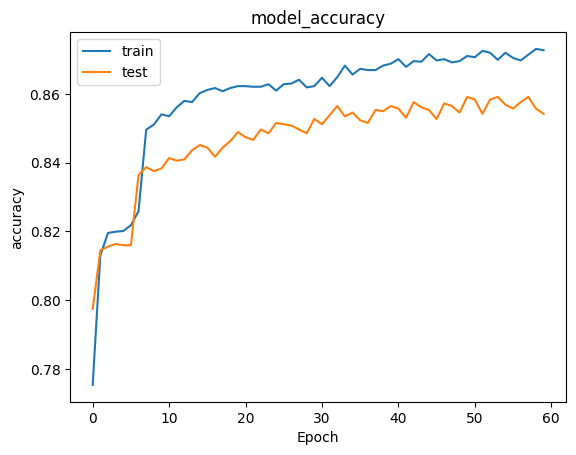

In [43]:
## summarize history of accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt. ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

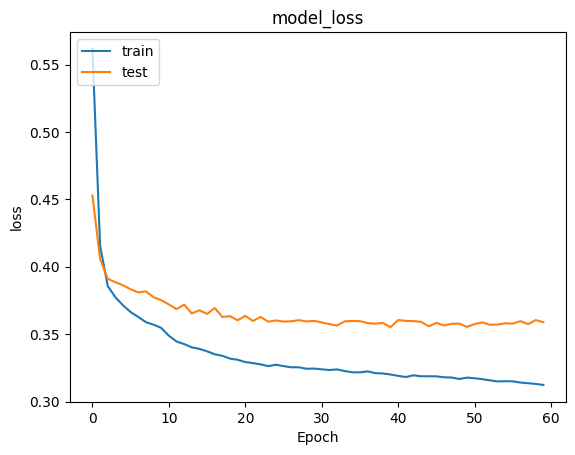

In [46]:
## summarize history of loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt. ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show

In [48]:
# part 3  making predictions and evaluating the model

# predicting the test set result
y_pred = Classifier.predict(x_test)
y_pred= (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [49]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1495,  100],
       [ 184,  221]])

In [50]:
## calculate the accuracy
from sklearn.metrics  import  accuracy_score
score= accuracy_score(y_pred,y_test)
score

0.858

In [52]:
## get weights
Classifier.get_weights()

[array([[ 0.12632978,  0.31519923, -0.05224086,  0.06014585,  0.07179179,
         -0.4622736 ,  0.12876491,  0.06125075, -0.05838446,  0.08747713,
          0.12066525],
        [ 0.10252874, -0.9158563 ,  0.3904778 ,  0.13901925,  0.667252  ,
         -0.76160073, -0.28912124, -0.9509314 , -0.12550147,  0.3570785 ,
         -0.97192127],
        [ 0.12247033, -0.21906605, -0.06120931,  0.18227448, -0.14662063,
          0.40096232, -0.0272807 ,  0.06751135,  0.28876406, -0.31253907,
         -0.02700233],
        [-0.38785785,  0.7188367 , -0.35678357, -1.4161961 , -0.06156397,
          0.9308826 , -0.4245631 , -0.01272938, -0.25395176,  0.8539805 ,
         -0.12056072],
        [-0.2241458 ,  0.32439014, -0.6627327 ,  0.07596605,  0.8117967 ,
         -0.38205898, -0.9223477 ,  0.1692709 ,  0.93749213, -0.11807819,
         -0.00730198],
        [ 0.05255637,  0.03742286, -0.08791512, -0.01859903,  0.08714328,
          0.4181761 ,  0.04150214,  0.15967222,  0.05633414, -0.0503297